<a href="https://colab.research.google.com/github/Sanjana-Kannoorkar/Data-Cleaning-and-Preprocessing/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#Installing Necessary packages
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [3]:
#Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [5]:
#Loading the dataset ('Titanic-Dataset.csv)
df = pd.read_csv('Titanic-Dataset.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
#Checking the basic information of the dataset
print("\n=== Dataset Info ===")
print(df.info())


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
#Checking the Missing Values
print("\n === Missing Values ===")
print(df.isnull().sum())
print(df.describe())


 === Missing Values ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std    

In [8]:
#HANDLING MISSING VALUES
#Dropping the 'Cabin' column because there are too many missing values
df.drop('Cabin', axis=1, inplace=True)

In [10]:
#Filling the missing values in 'Age' column using median
df['Age'].fillna(df['Age'].median(), inplace=True)

#Filling Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

#Verifying Clenaing
print("\n === Missing Values after cleaning ===")
print(df.isnull().sum())


 === Missing Values after cleaning ===
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-10-e9fcb1f26b91>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [11]:
#FEATURE ENGINEERING
from sklearn.preprocessing import LabelEncoder
#Converting 'Sex' column to binary using LabelEncoder. Male = 1, Female = 0
lbe = LabelEncoder()
df['Sex'] = lbe.fit_transform(df['Sex'])
print("\n === Label Encoding ===")
print(df['Sex'].value_counts())


 === Label Encoding ===
Sex
1    577
0    314
Name: count, dtype: int64


In [13]:
print("\n=== Final DataFrame Preview ===")
print(df.head())


=== Final DataFrame Preview ===
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Embarked  
0         A/5 21171   7.2500        S  
1          PC 17599  71.2833        C  
2  STON/O2. 3101282   7.9250        S  
3            113803  53.1000        S  
4            373450   8.0500        S  


In [14]:
#FEATURE SCALING
from sklearn.preprocessing import MinMaxScaler
numerical_cols = ['Age', 'Fare']
scaler = MinMaxScaler() #Initializing Scaler
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("\n === Scaled Values ===")
print(df[numerical_cols].head())


 === Scaled Values ===
        Age      Fare
0  0.271174  0.014151
1  0.472229  0.139136
2  0.321438  0.015469
3  0.434531  0.103644
4  0.434531  0.015713


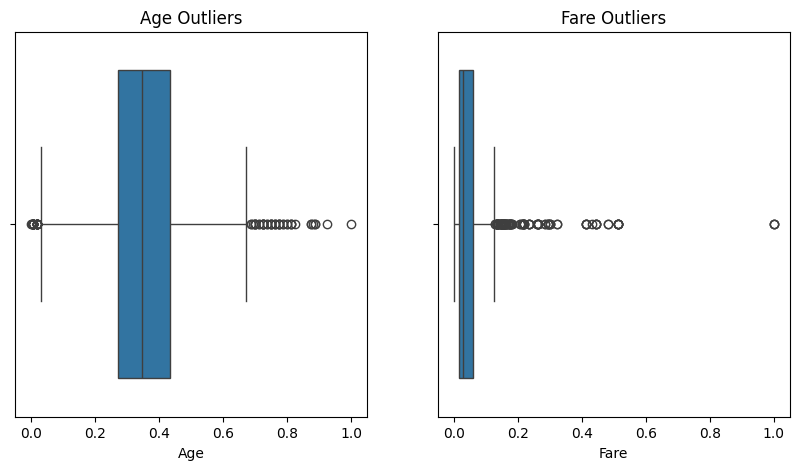

In [15]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sbn.boxplot(x=df['Age'])
plt.title('Age Outliers')

plt.subplot(1,2,2)
sbn.boxplot(x=df['Fare'])
plt.title('Fare Outliers')

plt.tight_layout
plt.show()

Original rows: 891 | Outliers removed: 116


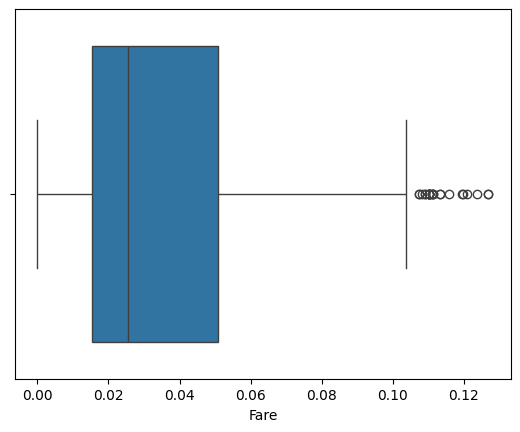

In [16]:
#OUTLIER HANDLING
#Removing fare Outlier using IQR Method
q1 = df['Fare'].quantile(0.25)
q2 = df['Fare'].quantile(0.75)
IQR = q2-q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q2 + 1.5 * IQR

df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

print(f"Original rows: 891 | Outliers removed: {891 - len(df)}")
sbn.boxplot(x=df['Fare'])
plt.show()

In [17]:
print("\n=== Summary After Outlier Removal ===")
print(df[['Age', 'Fare']].describe())


=== Summary After Outlier Removal ===
              Age        Fare
count  775.000000  775.000000
mean     0.355978    0.034786
std      0.160620    0.026503
min      0.000000    0.000000
25%      0.271174    0.015412
50%      0.346569    0.025374
75%      0.421965    0.050749
max      1.000000    0.126872


In [20]:
#SAVING THE CLEANED DATA
#Saving to Colab Storage
df.to_csv('cleaned_Titanic-Dataset.csv')

#Importing the necessary module for file downloading in Colab
from google.colab import files
files.download('cleaned_Titanic-Dataset.csv')

print("Saved file: 'cleaned_Titanic-Dataset.csv'")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved file: 'cleaned_Titanic-Dataset.csv'
